<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/vietocr-master'

/content/drive/MyDrive/vietocr-master


In [ ]:
!unzip -qq -o training_vietocr_final.zip

In [ ]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 27.0 MB/s eta 0:00:00


# Inference

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import os

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [5]:
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [6]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-04-16 06:48:47--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   472KB/s    in 0.6s    

2025-04-16 06:48:49 (472 KB/s) - ‘sample.zip’ saved [305969/305969]



In [ ]:
! unzip -qq -o crops.zip

In [ ]:
! ls sample | shuf |head -n 5

031189003299.jpeg
457_statuses_74396.jpg
2019_10_05_phung_vu_minh_phong_201910051031556_8.jpg
037188000873.jpeg
2019_10_04_tran_quang_dung_201910041118369_29.jpg


'Khi lắp camera và wiri thì an ninh của thôn rất tốt,'

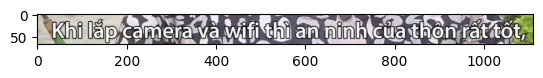

In [7]:
img = '/content/drive/MyDrive/vietocr-master/image/0d3b8e3c-021b-4b44-b53c-d6ab021037d5.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [8]:
from tqdm import tqdm  # Import tqdm for progress tracking

image_folder = './training_vietocr/VIETOCR_DATASET_FOLDER'
os.makedirs('output', exist_ok=True)  # Create output directory if it doesn't exist
output_folder = './output'

with open('output/result_2.txt', 'w') as f:
    for item in tqdm(os.listdir(image_folder), desc="Processing images"):  # Wrap with tqdm
        img_path = os.path.join(image_folder, item)
        try:
            img = Image.open(img_path)
            s = detector.predict(img)
            f.write(f'{item}: {s}\n')
        except Exception as e:
            print(f"Error processing {item}: {e}")  # Print any errors encountered

Processing images: 100%|██████████| 22945/22945 [2:03:32<00:00,  3.10it/s]


# Download sample dataset

In [ ]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-04-16 06:48:57--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  12.8MB/s    in 5.5s    

2025-04-16 06:49:04 (10.5 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [ ]:
! unzip -qq -o ./data_line.zip

In [ ]:
!unzip -qq -o ./training_vietocr.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
!pip install imgaug==0.4.0 --upgrade

In [ ]:
!pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 11.2.1 which is incompatible.


In [ ]:
pip install prefetch_generator

  Preparing metadata (setup.py) ... done
  Created wheel for prefetch_generator: filename=prefetch_generator-1.0.3-py3-none-any.whl size=4758 sha256=cddce65b0eaa05c404349bb8044163a1a5132247d6db7b44de111967b229b6bb
  Stored in directory: /root/.cache/pip/wheels/9b/08/01/8bacc997ecb83922063bc7dadb42f3cb52cfe43b5217caf820
Successfully built prefetch_generator


In [ ]:
pip install lmdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 21.0 MB/s eta 0:00:00


In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_annotation/',
    'train_annotation':'VIETOCR_DATASET_TRAIN.txt',
    'valid_annotation':'VIETOCR_DATASET_VAL.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_annotation/',
  'train_annotation': 'VIETOCR_DATASET_TRAIN.txt',
  'valid_annotation': 'VIETOCR_DATASET_VAL.txt',
  'image_height': 32,
  'image_min_width

You should train model from our pretrained

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:02<00:00, 226MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:00, 34572.05it/s]


train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|█████████████████████████████████| 5337/5337 [00:01<00:00, 3796.32it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|██████████████████████████████████| 1798/1798 [00:01<00:00, 977.55it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

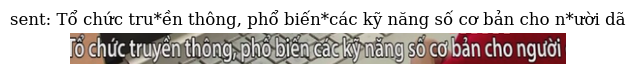

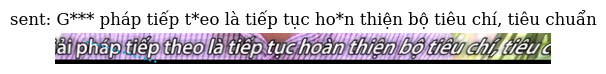

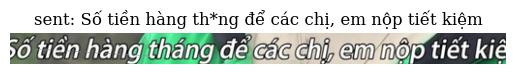

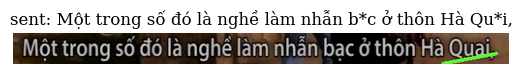

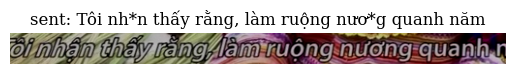

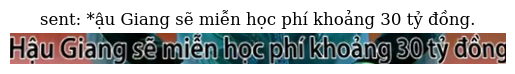

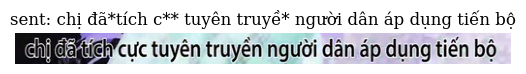

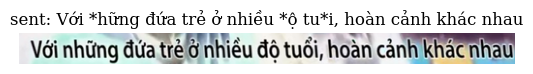

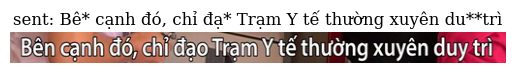

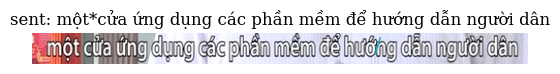

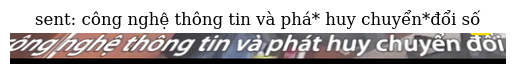

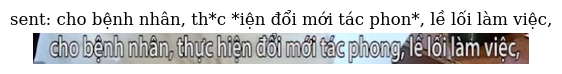

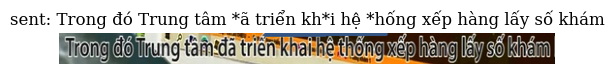

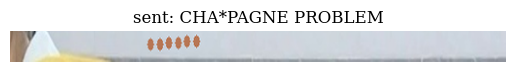

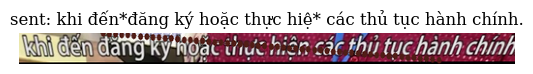

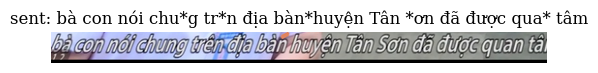

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 0.831 - lr: 1.91e-05 - load time: 0.45 - gpu time: 23.33
iter: 000400 - train loss: 0.755 - lr: 3.95e-05 - load time: 0.27 - gpu time: 21.03
iter: 000600 - train loss: 0.724 - lr: 7.14e-05 - load time: 0.28 - gpu time: 21.02
iter: 000800 - train loss: 0.727 - lr: 1.12e-04 - load time: 0.48 - gpu time: 21.00
iter: 001000 - train loss: 0.708 - lr: 1.56e-04 - load time: 0.27 - gpu time: 21.00
iter: 001200 - train loss: 0.717 - lr: 2.01e-04 - load time: 0.26 - gpu time: 20.81
iter: 001400 - train loss: 0.713 - lr: 2.41e-04 - load time: 0.50 - gpu time: 20.98
iter: 001600 - train loss: 0.709 - lr: 2.73e-04 - load time: 0.25 - gpu time: 21.10
iter: 001800 - train loss: 0.712 - lr: 2.93e-04 - load time: 0.27 - gpu time: 21.08
iter: 002000 - train loss: 0.699 - lr: 3.00e-04 - load time: 0.48 - gpu time: 21.12
iter: 002200 - train loss: 0.707 - lr: 3.00e-04 - load time: 0.28 - gpu time: 21.03
iter: 002400 - train loss: 0.701 - lr: 3.00e-04 - load time: 0.25 - gpu time

Visualize prediction from our trained model


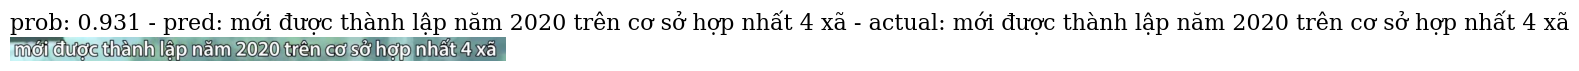

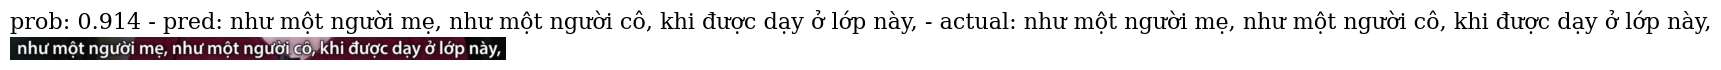

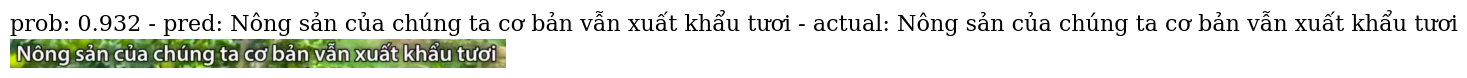

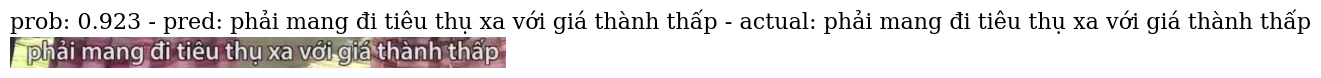

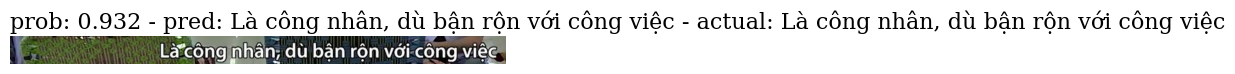

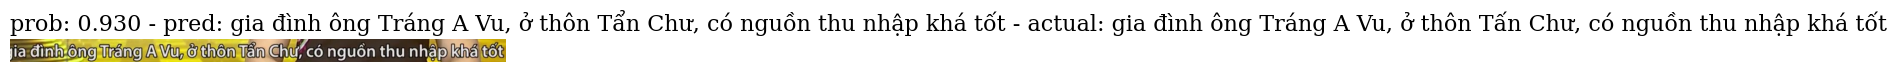

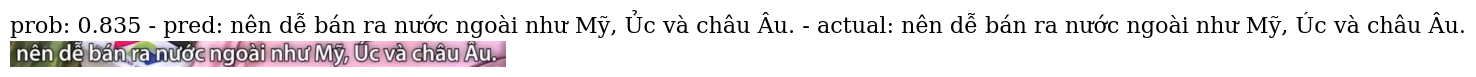

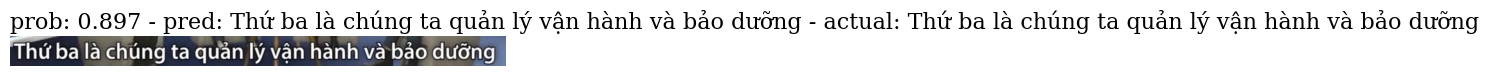

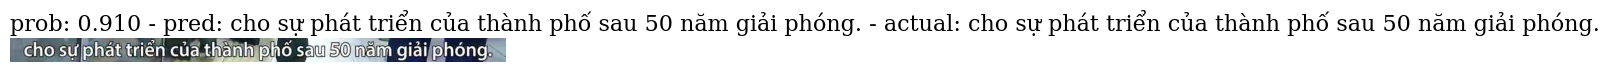

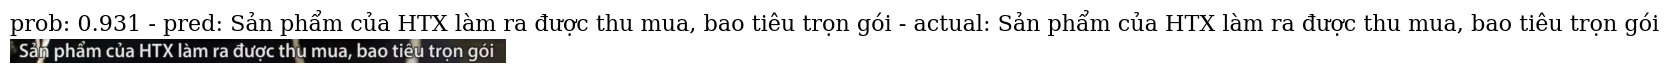

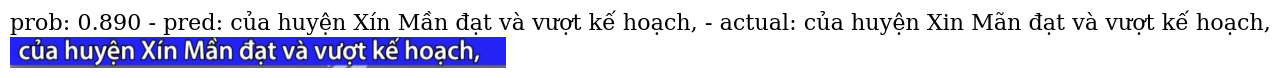

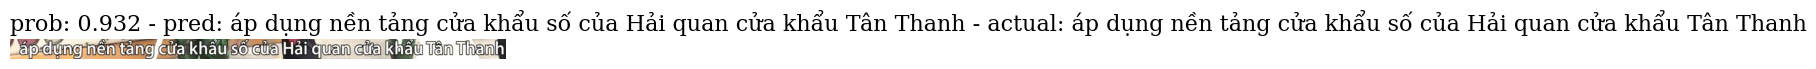

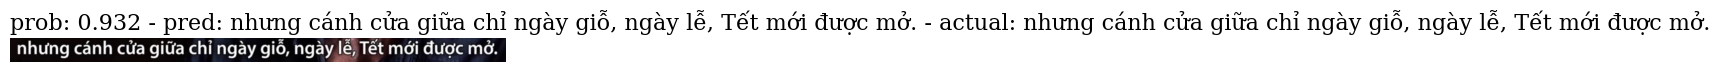

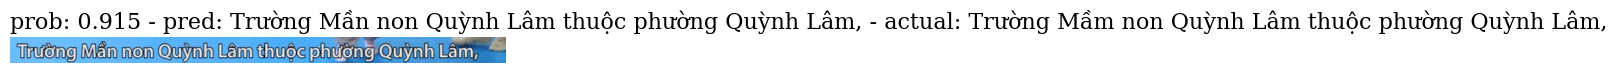

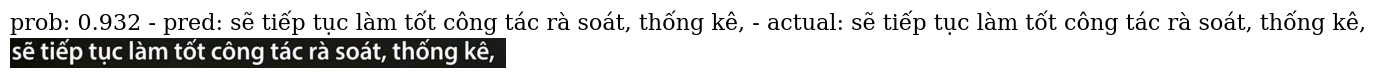

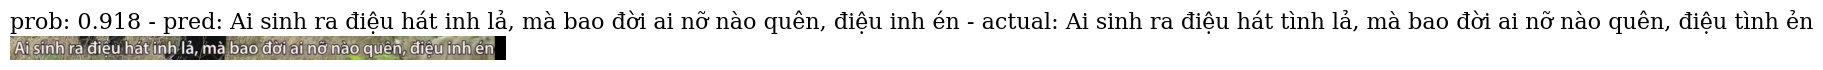

In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.7931547619047619, np.float32(0.94689125))